# (loadData)

In [2]:
# (大盤資料)
from data import Data

data = Data()

twii = data.get("發行量加權股價指數") 

twii = twii['台股指數']

twii.head()

date
2024-01-02 09:00:00    17930.81
2024-01-02 09:00:05    17939.79
2024-01-02 09:00:10    17925.03
2024-01-02 09:00:15    17930.45
2024-01-02 09:00:20    17927.95
Name: 台股指數, dtype: float64

In [3]:
# (選取1分K)
twii = twii[twii.index.second == 0]

<Axes: xlabel='date'>

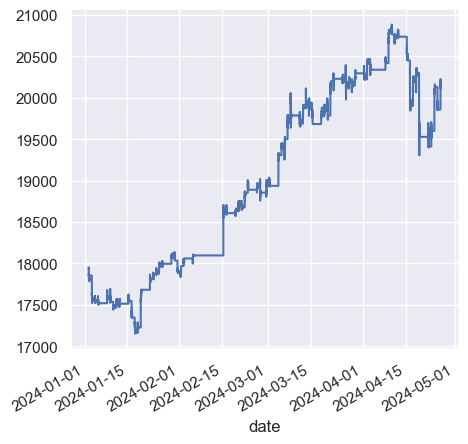

In [19]:
# (plot)
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use
# %matplotlib inline
sns.set() #----->轉換原圖樣式
twii.plot()

### /note : DataFrame 小教室：groupby

In [6]:
import pandas as pd

s = pd.Series([1,2,3,4,5,6])
s.groupby([0,1,0,1,0,1]).prod()

0    15
1    48
dtype: int64

In [7]:
df = pd.DataFrame({'a':s, 'b':s})
df
df.groupby([1,2,1,2,1,2]).prod()

,a,b
1,15,15
2,48,48


In [8]:
twii.head()

date
2024-01-02 09:00:00    17930.81
2024-01-02 09:01:00    17940.64
2024-01-02 09:02:00    17951.18
2024-01-02 09:03:00    17944.70
2024-01-02 09:04:00    17943.66
Name: 台股指數, dtype: float64

# (每月漲跌)

In [21]:
start_price = twii.groupby([twii.index.year, twii.index.month]).first() #----->月K開盤價
last_price = twii.groupby([twii.index.year, twii.index.month]).last() #----->月K收盤價
profit = (last_price/start_price)

# pandas <1.0.3
# profit.index.levels[0].name = 'year'
# profit.index.levels[1].name = 'month'

# pandas 1.0.3
#(調整表格欄位)
profit.index=profit.index.set_names(['year','month'], level=[0,1])
profit = profit.reset_index()
profit = profit.pivot_table(values='台股指數', index="year", columns="month")
# profit = profit.pivot_table(values=profit.columns[0], index="year", columns="month")
profit


month,1,2,3,4
year,,,,
2024,0.997699,1.060214,1.07,0.991429


### 每月漲跌色溫圖

<Axes: xlabel='month', ylabel='year'>

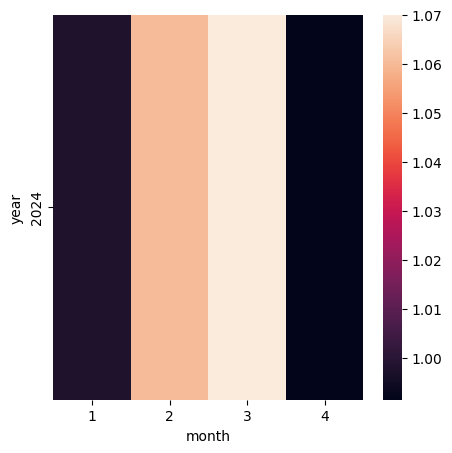

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5, 5)

sns.heatmap(profit)

# (均線、乖離率、profit分析)

In [28]:
# 每日收盤
twii_daily = twii.groupby(twii.index.date).last()
twii_daily.index = pd.to_datetime(twii_daily.index) #----->object to float

# 60日平均 : .rolling()
twii_average = twii_daily.rolling(60).mean()

# 乖離率
twii_bias = twii_daily / twii_average

# 後60日漲跌 : .shift()
twii_profit = twii_daily.shift(-60) / twii_daily

# 將資料合併
df = pd.DataFrame({
    'price': twii_daily,
    'sma': twii_average,
    'bias': twii_bias,
    'profit': twii_profit,
    'year': twii_daily.index.year,
})

# 刪除NaN
# df = df.dropna(how='any')
df

,price,sma,bias,profit,year
2024-01-02,17853.76,NaN,NaN,1.164808,2024
2024-01-03,17559.31,NaN,NaN,1.182480,2024
2024-01-04,17549.65,NaN,NaN,1.182543,2024
2024-01-05,17519.14,NaN,NaN,1.183652,2024
2024-01-08,17572.66,NaN,NaN,1.163726,2024
...,...,...,...,...,...
2024-04-22,19411.22,19266.342833,1.007520,NaN,2024
2024-04-23,19599.28,19303.883000,1.015302,NaN,2024
2024-04-24,20131.74,19353.382167,1.040218,NaN,2024
2024-04-25,19857.42,19397.209333,1.023726,NaN,2024


In [31]:
# 目前bias
twii_bias.tail()

2024-04-22    1.007520
2024-04-23    1.015302
2024-04-24    1.040218
2024-04-25    1.023726
2024-04-26    1.035120
Name: 台股指數, dtype: float64

## /(乖離率與profit做圖)

<Axes: >

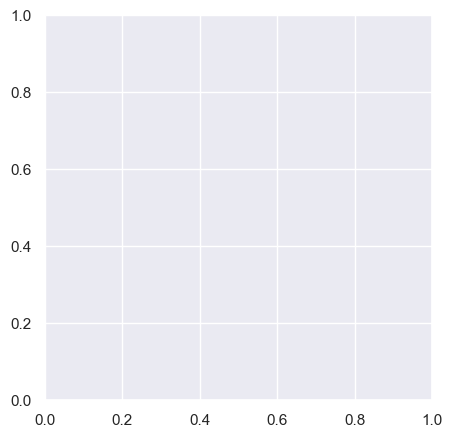

In [32]:
sns.scatterplot(x="bias", y="profit", data=df, hue="year", palette="Accent", legend="full")